In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

import weightedcalcs as wc


In [11]:
hh = pd.read_csv("household_data_pre.csv")

In [12]:
hh

,income,weights,homeshare,home_choice,consumption
0,0.390389,0.009584,0.998816,0.998816,0.304541
1,0.388221,0.007384,0.996913,0.996984,0.398361
2,0.386053,0.004162,0.994619,0.995239,0.444576
3,0.383886,0.001733,0.993378,0.994224,0.484351
4,0.381718,0.001195,0.991679,0.992914,0.514616
...,...,...,...,...,...
995,3.197489,0.000383,0.814991,0.835032,3.196209
996,3.195321,0.000501,0.814267,0.831131,3.289422
997,3.193153,0.000168,0.812955,0.826802,3.382503
998,3.190985,0.000178,0.811137,0.822134,3.475520


In [13]:
calc = wc.Calculator("weights")

In [42]:
foo = hh[((hh.income <= calc.quantile(hh, "income", 0.25)) )];

print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))

print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hh,"homeshare"), 4))

foo = hh[((hh.income > calc.quantile(hh, "income", 0.75)) )]

print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))

Bottom Quartile Trade Share
0.0179
 
Median Trade Share
0.0509
 
Top Quartile Trade Share
0.096


In [51]:
hhpost = pd.read_csv("household-data-%10.csv")
welfare = pd.read_csv("welfare-US-%10.csv")

In [52]:
hhpost = pd.merge(hhpost, welfare["welfare"], left_index = True, right_index = True)

In [53]:
hhpost

,income,weights,homeshare,home_choice,consumption,welfare
0,0.387042,0.009498,0.998548,0.998548,0.299929,0.041283
1,0.384842,0.007387,0.996248,0.996343,0.392989,0.056383
2,0.382642,0.004152,0.993640,0.994359,0.439049,0.068595
3,0.380443,0.001744,0.992145,0.993140,0.478391,0.077810
4,0.378243,0.001202,0.990241,0.991667,0.508527,0.086763
...,...,...,...,...,...,...
995,3.156600,0.000320,0.791773,0.813326,3.167346,0.530039
996,3.154400,0.000543,0.790889,0.808920,3.259273,0.531703
997,3.152200,0.000165,0.789342,0.804039,3.351084,0.533350
998,3.150000,0.000176,0.787222,0.798744,3.442706,0.535013


In [54]:
foo = hhpost[((hhpost.income <= calc.quantile(hhpost, "income", 0.25)) )];

######## Guys at bottom
print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Quartile Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Median
print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hhpost,"homeshare"), 4))
print(" ")
print("Bottom Median Welfare")
print(round(calc.median(hhpost,"welfare"),4))

foo = hhpost[((hhpost.income > calc.quantile(hhpost, "income", 0.75)) )]

######## Top
print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Median Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Aggregate 
print(" ")
print("Aggregate Welfare")
print(round(calc.mean(hhpost,"welfare"),4))

foo = hhpost[(hhpost.welfare <= 0.0 )];

print(" ")
print("Share who Loose")
print(round(foo.weights.sum(),4))

Bottom Quartile Trade Share
0.0208
 
Bottom Quartile Welfare
0.1247
 
Median Trade Share
0.0583
 
Bottom Median Welfare
0.1988
 
Top Quartile Trade Share
0.1094
 
Bottom Median Welfare
0.2963
 
Aggregate Welfare
0.2185
 
Share who Loose
0.0


0.1785


(-1.5, 1.5)

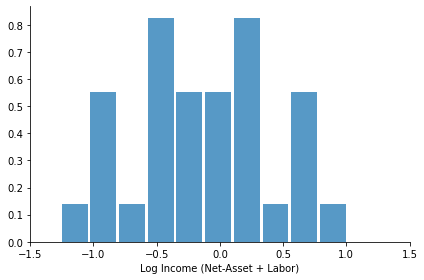

In [32]:
fig, ax = plt.subplots(tight_layout = True)

ax.hist(np.log(hh.income), weights = hh.weights, 
        density = True, bins = 10, rwidth = 0.90, alpha = 0.75);

ax.set_xlabel("Log Income (Net-Asset + Labor)")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlim(-1.5,1.5)